#                                          Customer Churn Analysis

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6216,7162-WPHPM,Male,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),71.60,4230.25,No
6822,5389-FFVKB,Male,1,Yes,No,32,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),80.30,2483.05,Yes
1326,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
1512,9314-IJWSQ,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.80,1203.9,No
4836,0584-BJQGZ,Female,0,No,No,25,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.35,1837.9,No
4303,3284-SVCRO,Female,0,Yes,No,45,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.50,1121.05,No
1353,7073-QETQY,Male,0,Yes,Yes,66,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,1359.5,No
4599,1834-ABKHQ,Female,0,Yes,Yes,52,Yes,No,DSL,No,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),50.95,2610.65,No
5095,7269-JISCY,Female,0,No,No,55,Yes,No,DSL,No,...,No,No,No,No,One year,No,Bank transfer (automatic),45.05,2462.6,No
679,2826-UWHIS,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),81.40,3775.85,No


# Data Analysing

In [4]:
data.shape
#Shape of the dataset...

(7043, 21)

In [5]:
data.info()
#Checking types of data set..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Checking unique values in column[Payment method] and [Contract]..
print(data['PaymentMethod'].nunique())
print(data["Contract"].nunique())

4
3


In [10]:
# remove (automatic) from payment method column.
data['PaymentMethod'] = data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [11]:
#converting this column from object to numeric data type...
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [12]:
data['TotalCharges'].dtype

dtype('float64')

# EDA

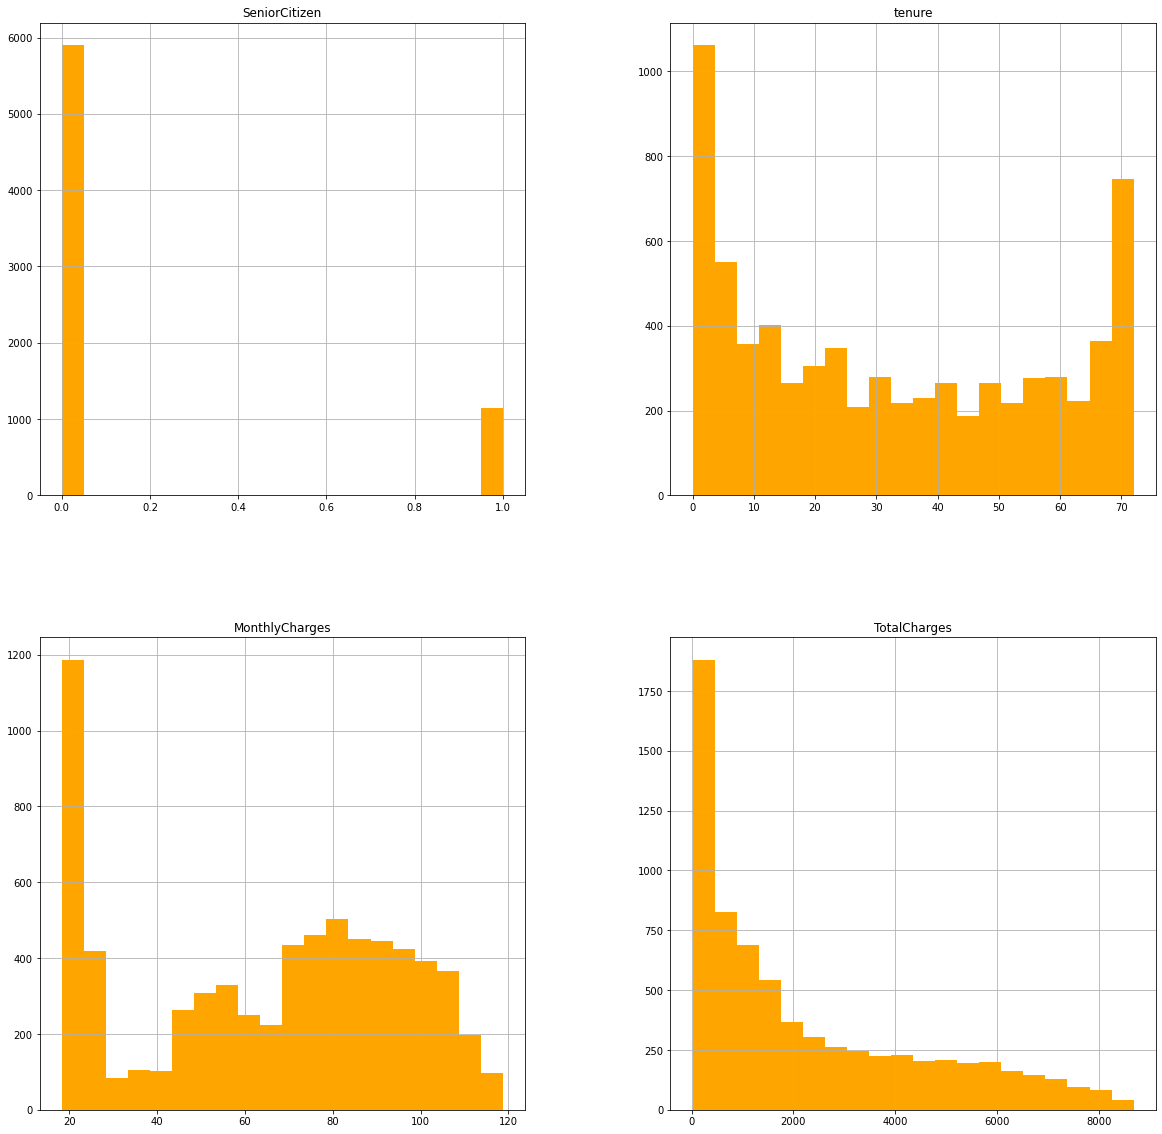

In [13]:
data.hist(bins = 20, figsize = (20,20), color = 'orange');

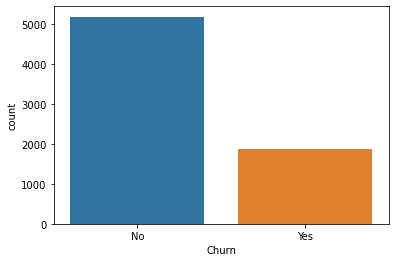

In [14]:
# Visualize the count of customer churn
sns.countplot(data['Churn'])
plt.show()

In [15]:
# Check the percentage of customer that are leaving
num_retained = data[data['Churn'] == 'No'].shape[0]
num_churned = data[data['Churn'] == 'Yes'].shape[0]

# Print the percentage of customer that stayed
print(num_retained / (num_retained + num_churned) * 100, '% of customer stayed with the company')

# Print the percentage of customer that left
print(num_churned / (num_retained + num_churned) * 100, '% of customer left with the company')

73.4630129206304 % of customer stayed with the company
26.536987079369588 % of customer left with the company


# Categoery Colm Information

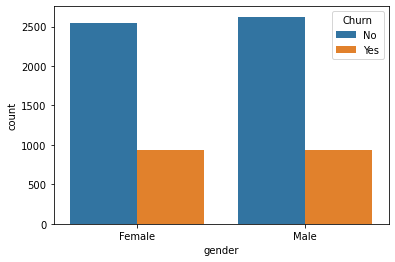

In [16]:
# Visualize the churn count for both male and females
sns.countplot(x = 'gender', hue = 'Churn', data = data)
plt.show()

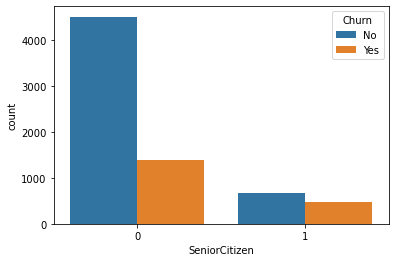

In [17]:
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = data)
plt.show()

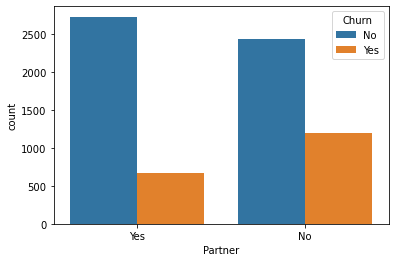

In [18]:
sns.countplot(x = 'Partner', hue = 'Churn', data = data)
plt.show()

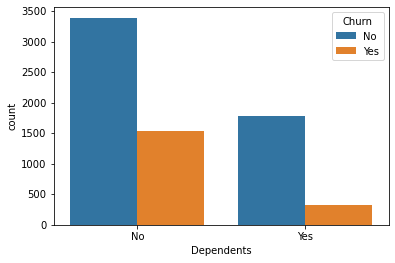

In [19]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = data)
plt.show()

# SERVICE INFORMATION:

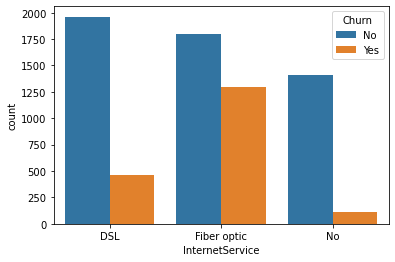

In [20]:
# Visualize the churn count for internet service
sns.countplot(x = 'InternetService', hue = 'Churn', data = data)
plt.show()

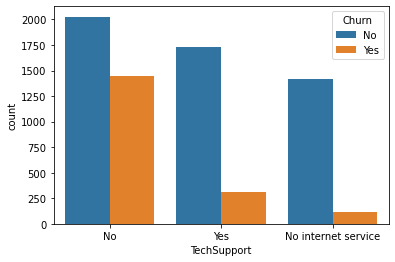

In [21]:
sns.countplot(x = 'TechSupport', hue = 'Churn', data = data)
plt.show()

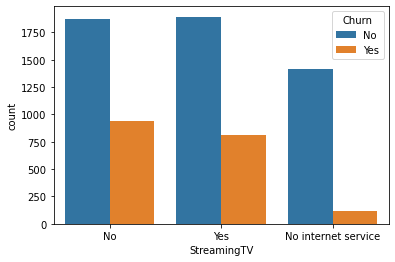

In [22]:
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = data)
plt.show()

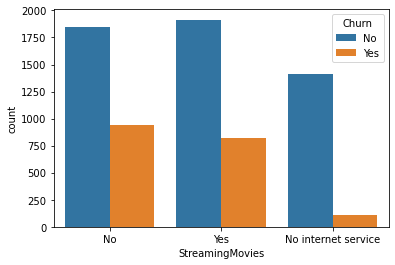

In [23]:
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = data)
plt.show()

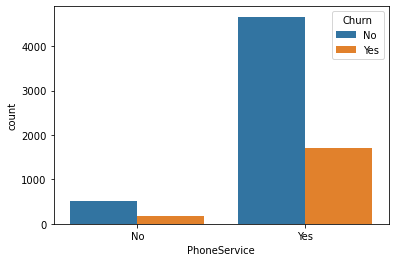

In [24]:
sns.countplot(x = 'PhoneService', hue = 'Churn', data = data)
plt.show()

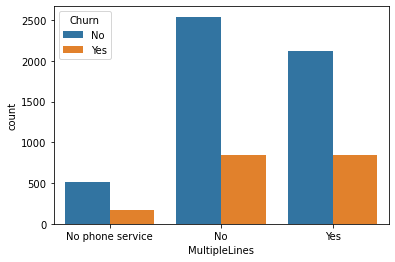

In [25]:
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = data)
plt.show()

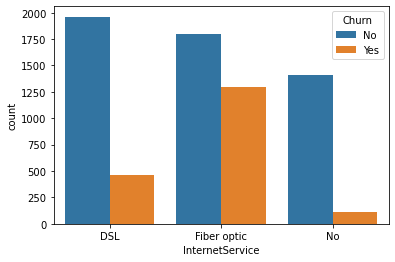

In [26]:
sns.countplot(x = 'InternetService', hue = 'Churn', data = data)
plt.show()

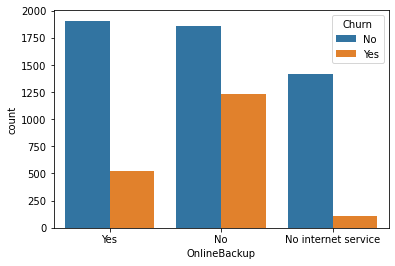

In [27]:
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = data)
plt.show()

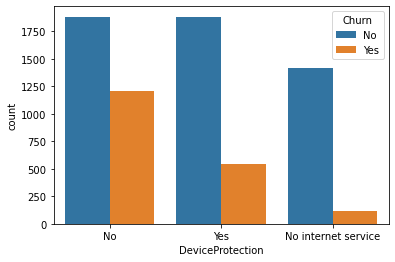

In [28]:
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = data)
plt.show()

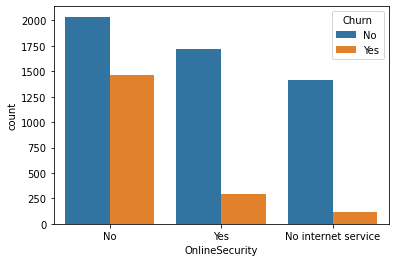

In [29]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = data)
plt.show()

# Customer Accnt Information

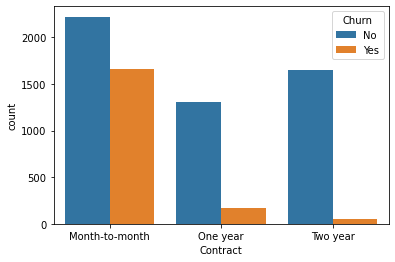

In [30]:
sns.countplot(x = 'Contract', hue = 'Churn', data = data)
plt.show()

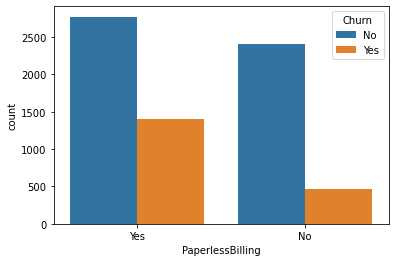

In [31]:
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = data)
plt.show()

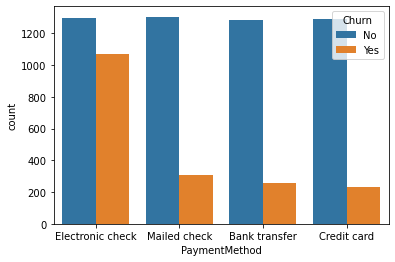

In [32]:
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = data)
plt.show()

# Encoding-LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [35]:
lab=LabelEncoder()
lab_count=0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            lab.fit(data[col])
            data[col] = lab.transform(data[col])
            lab_count += 1
            print(col)
print('{} columns were label encoded.'.format(lab_count))        

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


# Corealtion

In [36]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113008,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157830,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651065,0.193356
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199484,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

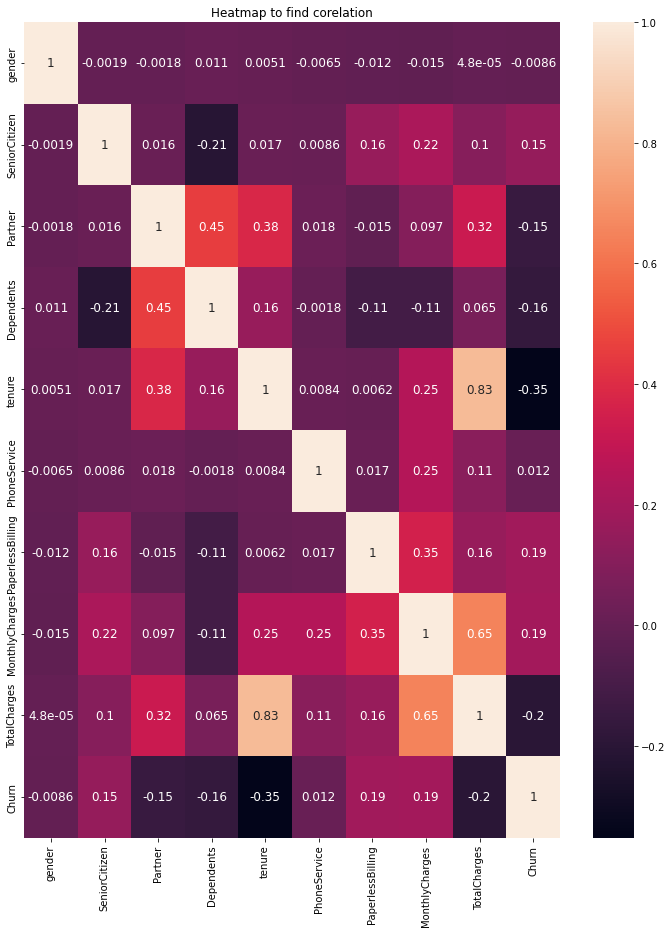

In [37]:
corr=data.corr()
plt.figure(figsize=(12,15))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show

Text(0, 0.5, 'Total Charges')

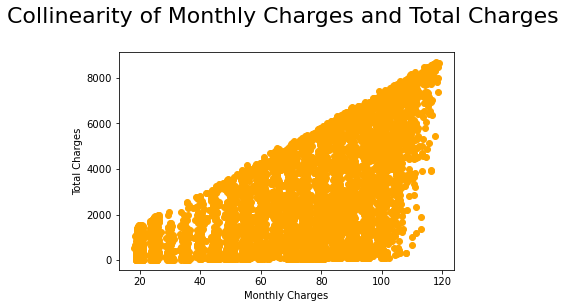

In [38]:
# Check colinearity:
x = data['MonthlyCharges']
y = data['TotalCharges']
plt.scatter(x, y, color =  'orange')
plt.title('Collinearity of Monthly Charges and Total Charges \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

# Multicollinearity using ViF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
dataset_vif = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]
calc_vif(dataset_vif)

,variables,VIF
0,gender,1.922523
1,SeniorCitizen,1.327942
2,Partner,2.813694
3,Dependents,1.919266
4,tenure,10.727299
5,PhoneService,8.030292
6,PaperlessBilling,2.816921
7,MonthlyCharges,14.109313
8,TotalCharges,12.740486


In [41]:
#Dropping 'TotalCharges':
    
dataset_new = dataset_vif.drop(columns = "TotalCharges")
#Revalidate Colinearity:
dataset_new = data[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges']]
calc_vif(dataset_new)

,variables,VIF
0,gender,1.878863
1,SeniorCitizen,1.323160
2,Partner,2.812757
3,Dependents,1.904657
4,tenure,3.299933
5,PhoneService,5.967552
6,PaperlessBilling,2.748477
7,MonthlyCharges,7.465415


In [42]:
data = data.drop(columns = "TotalCharges")
#Dropping TotalCharges...

In [43]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [44]:
data.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
PaperlessBilling   -0.377503
MonthlyCharges     -0.222103
Churn               1.060622
dtype: float64

In [45]:
data=data.drop(columns="customerID")

In [46]:
data=pd.get_dummies(data)

In [47]:
Y = data["Churn"]
X= data.drop(columns="Churn")

In [48]:
Y.shape

(7032,)

In [49]:
X.shape

(7032, 39)

# StandardScaler

In [50]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.828939,-1.161694,-0.963411,3.056334,...,1.236360,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-1.206361,-0.260878,1.037979,-0.327189,...,1.236360,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.828939,-0.363923,1.037979,-0.327189,...,1.236360,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-1.206361,-0.747850,-0.963411,3.056334,...,1.236360,-0.52513,-0.796849,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.828939,0.196178,1.037979,-0.327189,...,1.236360,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,0.828939,0.664868,-0.963411,-0.327189,...,-0.808826,-0.52513,1.254943,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
7028,-1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,0.828939,1.276493,-0.963411,-0.327189,...,-0.808826,-0.52513,1.254943,-1.107895,1.943495,-0.561364,-0.529976,1.903490,-0.711863,-0.543604
7029,-1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,0.828939,-1.170004,-0.963411,3.056334,...,1.236360,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
7030,0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,0.828939,0.319168,-0.963411,-0.327189,...,1.236360,-0.52513,-0.796849,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# ModelBuilding

# LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8253697383390216 on Random State 99


In [53]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25, random_state = max_rs )

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)

print(accuracy_score(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))
print(classification_report(y_test,LR_pred))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

0.8253697383390216
[[1200  109]
 [ 198  251]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1309
           1       0.70      0.56      0.62       449

    accuracy                           0.83      1758
   macro avg       0.78      0.74      0.75      1758
weighted avg       0.82      0.83      0.82      1758

Training accuracy:: 0.798445202882063
Test accuracy:: 0.8253697383390216


In [56]:
print(cross_val_score(LR,X,Y,cv=5).mean())

0.800907674591885


# KNeighbors Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.78839590443686
[[1151  158]
 [ 214  235]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1309
           1       0.60      0.52      0.56       449

    accuracy                           0.79      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758

Training accuracy:: 0.8392112248767539
Test accuracy:: 0.78839590443686


In [59]:
print(cross_val_score(knn,X,Y,cv=5).mean())

0.7713292913607133


# DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))
print("Training accuracy::",DT.score(x_train,y_train))
print("Test accuracy::",DT.score(x_test,y_test))

0.7622298065984073
[[1107  202]
 [ 216  233]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1309
           1       0.54      0.52      0.53       449

    accuracy                           0.76      1758
   macro avg       0.69      0.68      0.68      1758
weighted avg       0.76      0.76      0.76      1758

Training accuracy:: 0.997155858930603
Test accuracy:: 0.7622298065984073


In [62]:
print(cross_val_score(DT,X,Y,cv=5).mean())

0.7191408331235511


# RandomforestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
print(accuracy_score(y_test,pred_RF))
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print("Training accuracy::",RF.score(x_train,y_train))
print("Test accuracy::",RF.score(x_test,y_test))

0.7946530147895335
[[1185  124]
 [ 237  212]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1309
           1       0.63      0.47      0.54       449

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758

Training accuracy:: 0.997155858930603
Test accuracy:: 0.7946530147895335


In [65]:
print(cross_val_score(RF,X,Y,cv=5).mean())

0.7838425228056022


# AdaBosstClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
pred_ADA=ADA.predict(x_test)
print(accuracy_score(y_test,pred_ADA))
print(confusion_matrix(y_test,pred_ADA))
print(classification_report(y_test,pred_ADA))
print("Training accuracy::",ADA.score(x_train,y_train))
print("Test accuracy::",ADA.score(x_test,y_test))

0.8242320819112628
[[1207  102]
 [ 207  242]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1309
           1       0.70      0.54      0.61       449

    accuracy                           0.82      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.82      0.82      0.82      1758

Training accuracy:: 0.7986348122866894
Test accuracy:: 0.8242320819112628


In [68]:
print(cross_val_score(ADA,X,Y,cv=5).mean())

0.8020453513776372


# ROC Curve

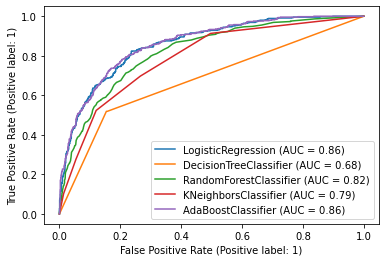

In [69]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ADA, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

# HyperParameterTuning

In [71]:
from sklearn.model_selection import  GridSearchCV

In [74]:
lg = LogisticRegression(random_state=0)

param_grid = {'solver':['liblinear'],
              'penalty': ['l1'],
             'C': np.linspace(2,1,50)}

lg_cv = GridSearchCV(lg, param_grid,scoring="roc_auc", verbose=1).fit(x_train,y_train)


print("Tuned Decision Logistic Regression: {}".format(lg_cv.best_params_))
print("Best score is {}".format(lg_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Tuned Decision Logistic Regression: {'C': 1.4285714285714286, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.8363470707513564


In [75]:
param_dist = {'n_neighbors': range(1,10), 'weights': ['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2]}

knn = KNeighborsClassifier().fit(x_train,y_train)


knn_cv = GridSearchCV(knn, param_dist,n_jobs=-1, verbose=1).fit(x_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Tuned Decision Tree Parameters: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Best score is 0.7787255051844925


In [78]:
DT = DecisionTreeClassifier(random_state=0)

param_dist = {
              'max_depth': [None,2,4,6],
              "min_samples_leaf": [2,4,6],
              "min_samples_split": [6,7,8,9], #0.5
              "criterion": ["gini"],
              "max_features":[None]}

DT_rs = GridSearchCV(DT,param_dist,scoring='roc_auc', verbose=1,n_jobs=-1).fit(x_train,y_train)

print('Best params achieve a train score of', abs(DT_rs.best_score_),'with the params:')
DT_rs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params achieve a train score of 0.8255361196776224 with the params:


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [80]:
DT = DecisionTreeClassifier(random_state=0,
                            max_depth=None,
                            min_samples_leaf=2,
                            min_samples_split=9)

In [81]:
param_dist = {'n_estimators': range(400,600,25), 
              'learning_rate': [0.01],
              'algorithm':['SAMME.R']}

ADA = AdaBoostClassifier(DT,random_state=0)

ADA_cv = GridSearchCV(ADA, param_dist, cv=5, n_jobs=-1,verbose=1).fit(x_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(ADA_cv.best_params_))
print("Best score is {}".format(ADA_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuned Decision Tree Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 450}
Best score is 0.776826353228954


In [82]:
RF = RandomForestClassifier(random_state=0)

param_dist = {"n_estimators": [1600,1700,1900,2000],
              'max_depth': [None,2],
              "min_samples_leaf": [1,2],
              "min_samples_split": [2,3], #0.5
              "criterion": ["gini"]}

#RF_rs = RandomizedSearchCV(RF_cls, param_distributions=param_dist, cv=5, n_iter =25,verbose=True,random_state=0,scoring='recall', n_jobs=-1).fit(X_train,y_train)
RF_gs2 = GridSearchCV(estimator=RF,param_grid=param_dist,scoring='roc_auc', verbose=True, n_jobs=-1).fit(x_train,y_train)



print('Best params achieve a train score of', abs(RF_gs2.best_score_),'with the params:')
RF_gs2.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params achieve a train score of 0.8288863970285574 with the params:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1900}

In [ ]:
lg = LogisticRegression(random_state=0)

param_grid = {'solver':['liblinear'],
              'penalty': ['l1'],
             'C': np.linspace(2,1,50)}

lg_cv = GridSearchCV(lg, param_grid,scoring="roc_auc", verbose=1).fit(x_train,y_train)


print("Tuned Decision Logistic Regression: {}".format(lg_cv.best_params_))
print("Best score is {}".format(lg_cv.best_score_))

In [87]:
from sklearn.metrics import roc_auc_score

In [89]:
model = LogisticRegression( solver = 'liblinear', penalty='l1')

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,LR_pred)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

Accuracy Score: 82.53697383390217%
---------------------------------------------------
roc_auc_score: 73.78751865192321%
---------------------------------------------------
Confusion Matrix : 
 [[1200  109]
 [ 198  251]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1309
           1       0.70      0.56      0.62       449

    accuracy                           0.83      1758
   macro avg       0.78      0.74      0.75      1758
weighted avg       0.82      0.83      0.82      1758

---------------------------------------------------


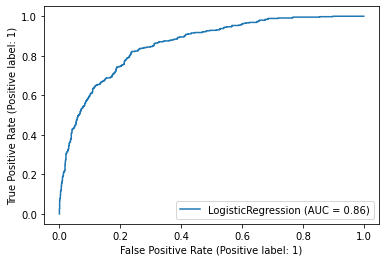

In [90]:
plot_roc_curve(model, x_test, y_test)
plt.show()

# Conclusion

In [91]:
print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(LR_pred, y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_RF, y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_knn, y_test)))
print("DecisionTreeClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_DT, y_test)))
print("AdaBoostClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_ADA, y_test)))

Logistic Regression Classifier: 82.54% Accuracy
Random Forest Classifier: 79.47% Accuracy
K-Nearest Neighbors Classifier: 78.84% Accuracy
DecisionTreeClassifier: 76.22% Accuracy
AdaBoostClassifier: 82.42% Accuracy


In [92]:
import joblib
joblib.dump(model,"Customer_CHURN.pkl")

['Customer_CHURN.pkl']